In [130]:
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import xgboost
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import math
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
pd.set_option('display.max_rows', 1000)

trainingFile = "./data/train.csv"
testFile = "./data/test.csv"

trainDf = pd.read_csv(trainingFile, header = 0)
testDf = pd.read_csv(testFile, header = 0)

target = 'SalePrice'

Y = trainDf[target]

training = trainDf.drop(['Id', target], axis = 1)

training['GarageYrBlt'] = training['GarageYrBlt'].fillna(1900.0).astype(int)

cat_features = []
cat_features_idx = []
str_cols = []
str_cols_idx = []

pos = 0
for c in training.columns:
    if c != target:
        if training[c].dtype == np.object:
            str_cols.append(c)
            str_cols_idx.append(pos)
        pos = pos + 1
        
#for c in str_cols:
#  training[c] = training[c].fillna("$NULL")
  
enc = ce.OrdinalEncoder(cols = str_cols)
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
norm = Normalizer('l2')


lr = LinearRegression()




In [104]:
#display

print(training.dtypes)
display(training)


MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,$NULL,Reg,Lvl,AllPub,Inside,...,0,0,$NULL,$NULL,$NULL,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,$NULL,Reg,Lvl,AllPub,FR2,...,0,0,$NULL,$NULL,$NULL,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,$NULL,IR1,Lvl,AllPub,Inside,...,0,0,$NULL,$NULL,$NULL,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,$NULL,IR1,Lvl,AllPub,Corner,...,0,0,$NULL,$NULL,$NULL,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,$NULL,IR1,Lvl,AllPub,FR2,...,0,0,$NULL,$NULL,$NULL,0,12,2008,WD,Normal
5,50,RL,85.0,14115,Pave,$NULL,IR1,Lvl,AllPub,Inside,...,0,0,$NULL,MnPrv,Shed,700,10,2009,WD,Normal
6,20,RL,75.0,10084,Pave,$NULL,Reg,Lvl,AllPub,Inside,...,0,0,$NULL,$NULL,$NULL,0,8,2007,WD,Normal
7,60,RL,NaN,10382,Pave,$NULL,IR1,Lvl,AllPub,Corner,...,0,0,$NULL,$NULL,Shed,350,11,2009,WD,Normal
8,50,RM,51.0,6120,Pave,$NULL,Reg,Lvl,AllPub,Inside,...,0,0,$NULL,$NULL,$NULL,0,4,2008,WD,Abnorml
9,190,RL,50.0,7420,Pave,$NULL,Reg,Lvl,AllPub,Corner,...,0,0,$NULL,$NULL,$NULL,0,1,2008,WD,Normal


In [68]:
#correlations

t_pipe = Pipeline(steps = [
    ('catencode', enc), 
    ('null_handler', imp)])

transformed = t_pipe.fit_transform(training)

t_df = pd.DataFrame(data = transformed, columns = training.columns)

correlations = {}
features = t_df.columns

for f in features:
    if f != target:
        x1 = t_df[f]
        key = f + ' vs ' + target
        correlations[key] = pearsonr(x1, Y)[0]


data_correlations = pd.DataFrame(correlations, index=['Value']).T
sorted_c = data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

pd.set_option('display.max_rows', None)
display(sorted_c)



,Value
LotArea vs SalePrice,0.790982
HouseStyle vs SalePrice,0.708624
MasVnrArea vs SalePrice,0.640409
ExterQual vs SalePrice,0.623431
Neighborhood vs SalePrice,0.613581
Condition1 vs SalePrice,0.605852
YearBuilt vs SalePrice,0.560664
Exterior1st vs SalePrice,0.533723
Alley vs SalePrice,0.522897
MasVnrType vs SalePrice,0.518287


Train with alpha  0.01
KFold iteration  0
47852.88413208663
KFold iteration  1
47852.88413208663
KFold iteration  2
47852.88413208663
KFold iteration  3
47852.88413208663
KFold iteration  4
47852.88413208663
KFold iteration  5
47852.88413208663
KFold iteration  6
47852.88413208663
KFold iteration  7
47852.88413208663
KFold iteration  8
47852.88413208663
KFold iteration  9
47852.88413208663
Train with alpha  0.03
KFold iteration  0
46935.72191247061
KFold iteration  1
46935.72191247061
KFold iteration  2
46935.72191247061
KFold iteration  3
46935.72191247061
KFold iteration  4
46935.72191247061
KFold iteration  5
46935.72191247061
KFold iteration  6
46935.72191247061
KFold iteration  7
46935.72191247061
KFold iteration  8
46935.72191247061
KFold iteration  9
46935.72191247061
Train with alpha  0.05
KFold iteration  0
46904.01706093184
KFold iteration  1
46904.01706093184
KFold iteration  2
46904.01706093184
KFold iteration  3
46904.01706093184
KFold iteration  4
46904.01706093184
KFold 

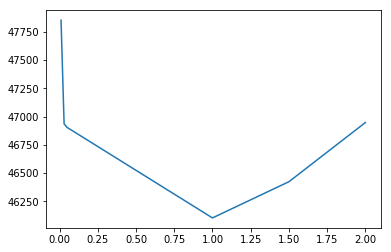

In [131]:
# train with lr

rmses = []
pipelines = []
range = [0.01, 0.03, 0.05, 1.0, 1.5, 2.0]

for l in range:
    print("Train with alpha ", l)
    ridge_reg = Ridge(alpha=l, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

    pipeline = Pipeline(steps = [
        ('catencode', enc), 
        ('null_handler', imp), 
        #('normalization', norm),    
        ('lr', ridge_reg)])
    
    kf = KFold(n_splits = 10)
    
    iter_rmse = []
    iteration = 0
    for train_idx, test_idx in kf.split(training):
        print("KFold iteration ", iteration )
        X_train, X_test = training.iloc[train_index], training.iloc[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        
        model = pipeline.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_predict)
        rmse = math.sqrt(mse)
        print(rmse)
        iter_rmse.append(rmse)
        iteration += 1
    
    rmses.append(np.mean(iter_rmse))
    pipelines.append(pipeline)

min_index = np.argmin(rmses)
print('Min RMSE index: ', min_index)


best_pipeline = pipelines[min_index]
print('Best pipeline', best_pipeline)

plt.plot(range, rmses)
plt.show()


In [132]:
sp_id = testDf['Id']
sp_x = testDf.drop('Id', axis = 1)

m = best_pipeline.fit(training, Y)
pred = m.predict(sp_x)


result = pd.DataFrame({'Id': sp_id, 'SalePrice': pred}, index = None)

display(result)
result.to_csv('./submission.csv', index = False)


,Id,SalePrice
0,1461,117661.468358
1,1462,159795.536408
2,1463,193079.441281
3,1464,213163.500574
4,1465,184097.867705
5,1466,191941.364424
6,1467,191375.402058
7,1468,185913.545528
8,1469,203476.424935
9,1470,124442.023512
